In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats

In [4]:
df = pd.read_csv('./stud.csv', sep=',')

df.head()

,StudentID,Age,email,hrsStudy,FinalGrade
0,47412,20,s47412@oslomet.no,5,46.0
1,15077,22,s15077@oslomet.no,0,65.0
2,15467,27,s15467@oslomet.no,1,26.0
3,17907,21,s17907@oslomet.no,6,68.0
4,13352,333,s13352@oslomet.no,4,34.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         50 non-null     object 
 2   email       50 non-null     object 
 3   hrsStudy    50 non-null     object 
 4   FinalGrade  49 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    1
dtype: int64

In [11]:
df=df.replace(r'^\s*$', np.nan, regex=True) #Replace blank values with np.nan values

#As you can see, the index counts to 49, but we have dropped several values.. to reset the index you can use
df = df.reset_index(drop=True)


#df['FinalGrade'] = df['FinalGrade'].astype(str).astype(int) #Convert from obj to int

In [16]:
df.info()

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   48 non-null     int64  
 1   Age         48 non-null     object 
 2   email       48 non-null     object 
 3   hrsStudy    48 non-null     object 
 4   FinalGrade  48 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.2+ KB


StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    0
dtype: int64

In [13]:
# age is not important, replace with dummy 0
df["Age"].replace(np.nan, 0, inplace=True)

In [15]:
df.dropna(inplace = True)

In [17]:
df['Age'] = df['Age'].astype(str).astype(int)
df['hrsStudy'] = df['hrsStudy'].astype(str).astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   48 non-null     int64  
 1   Age         48 non-null     int64  
 2   email       48 non-null     object 
 3   hrsStudy    48 non-null     int64  
 4   FinalGrade  48 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.2+ KB


<AxesSubplot:>

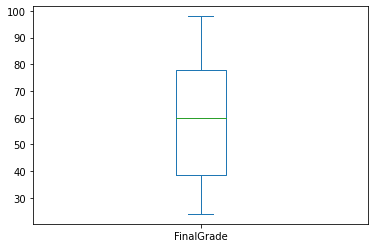

In [21]:
df = df[df.FinalGrade <= 100]
df['FinalGrade'].plot.box()

In [22]:
conditions = [
    (df['FinalGrade'] <= 50.0),
    (df['FinalGrade'] > 50.0) & (df['FinalGrade'] <= 60.0),
    (df['FinalGrade'] > 60.0) & (df['FinalGrade'] <= 70.0),
    (df['FinalGrade'] > 70.0) & (df['FinalGrade'] <= 80.0),
    (df['FinalGrade'] > 80.0) & (df['FinalGrade'] <= 90.0),
    (df['FinalGrade'] > 90.0)
    ]

# create a list of the values we want to assign for each condition
values = ['F', 'E', 'D', 'C', 'B', 'A']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Grade'] = np.select(conditions, values)

In [23]:
df.head()

,StudentID,Age,email,hrsStudy,FinalGrade,Grade
0,47412,20,s47412@oslomet.no,5,46.0,F
1,15077,22,s15077@oslomet.no,0,65.0,D
2,15467,27,s15467@oslomet.no,1,26.0,F
3,17907,21,s17907@oslomet.no,6,68.0,D
4,13352,333,s13352@oslomet.no,4,34.0,F


In [32]:
df_grade_count = df.groupby('Grade').count()


In [26]:
df_grade_count.FinalGrade

Grade
A     5
B     5
C     6
D     7
E     5
F    19
Name: FinalGrade, dtype: int64

<AxesSubplot:xlabel='Grade'>

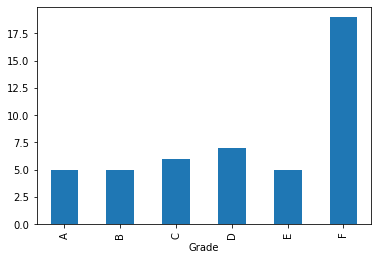

In [30]:
df_grade_count["FinalGrade"].plot.bar()